
## Alex Fiacco
## acf2796


# **Final Project: Using Historical Data to Predict NBA Players' Future Scoring Performances and Offensive Impact**


**About the Dataset - NBA Players' Stats (2023)**

  In the realm of basketball analytics, accurately predicting a player's offensive performance is paramount, especially in the NBA. It stands as a pivotal metric for evaluating a player's scoring prowess and offensive impact on the team, crucial for coaches, analysts, and fans alike. Understanding what each player brings to their team and the scoring potential of players facilitates strategic decision-making during games, aids in player selection, and enhances talent scouting efforts. This dataset contains statistics tracking various offensive and defensive metrics such as points scored, three-point percentage, free throws attempted, blocks, and more for 500+ NBA players over the 2023 NBA season.

**Research Question and Learning Models**

My research question aims to explore the correlation between various statistical factors and the number of points scored (PTS) and a player's offensive impact in basketball games. Specifically, I want to understand which statistics have the strongest relationship with scoring performance, which is captured by the features PTS (total points) and PPG (points per game) in the dataset.

To achieve this, I plan to use several regression models (simple linear, KNN, random forest, and decision tree), as my goal is to predict the number of points scored (PTS) based on multiple input variables. This will involve using various player statistics such as field goal percentage, assists, rebounds, steals, and turnovers, among others. By analyzing this data and building regression models, I hope to uncover insights into which statistical metrics are most predictive of scoring output in basketball and also how different regression models predict the data.

**Current Expectations about the Results**

I anticipate that players with the highest field goal and free throw attempts will tend to score the most points, especially if they also have high field goal percentages. Field goal attempts and free throw attempts are direct indicators of a player's offensive involvement, while high field goal percentages suggest efficiency in scoring.

Furthermore, I expect players with high field goal percentages to have a strong positive correlation with points scored, as efficient shooting typically leads to higher scoring outputs. This expectation is grounded in the understanding that players who can consistently convert their field goal attempts into points are likely to contribute significantly to their team's scoring efforts.

As for the different models being used to conduct this analysis, I anticipate that the Random Forest Regressor will yield the most accurate predictions. Random Forest Regressor tends to perform well in scenarios where there are complex relationships between the input features and the target variable, which is the case in basketball analytics. Additionally, its ability to handle a large number of input features and reduce overfitting through ensemble learning makes it a strong candidate for this prediction task.

**How I Will Evaluate My Project**

In assessing the correctness of the models, I will employ a comprehensive approach that incorporates cross-validation, performance metrics, and comparative analysis, with a particular emphasis on R-squared (R2) score and cross-validation techniques. Utilizing k-fold cross-validation, I will split the data into multiple subsets for training and testing, ensuring robust evaluation and reducing the risk of overfitting. Performance metrics such as mean squared error (MSE), root mean squared error (RMSE), and mean absolute error (MAE) will be employed alongside R2 score to quantitatively assess the model's predictive accuracy and its ability to capture the variance in the target variable. Through comparative analysis, I will evaluate the performance of different models—Linear Regression, KNeighbors Regressor, and Random Forest Regressor—based on these metrics, enabling me to identify the most effective approach for predicting points scored. This multi-faceted evaluation framework ensures a thorough assessment of the models' performance and provides reliable insights into player scoring potential.

Given that basketball is a dynamic and multifaceted sport with various factors influencing scoring, it's reasonable to expect that the model may not achieve perfect accuracy. However, with careful feature selection, model tuning, and evaluation, I anticipate that the model can provide meaningful insights and reasonably accurate predictions of basketball points.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split , GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, f1_score, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
%matplotlib inline

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Load the dataset
df = pd.read_csv('/content/drive/MyDrive/CS 329E/Term Project/2023_nba_player_stats.csv')

df

,PName,POS,Team,Age,GP,W,L,Min,PTS,FGM,...,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-
0,Jayson Tatum,SF,BOS,25,74,52,22,2732.2,2225,727,...,649,342,213,78,51,160,3691,31,1,470
1,Joel Embiid,C,PHI,29,66,43,23,2284.1,2183,728,...,670,274,226,66,112,205,3706,39,1,424
2,Luka Doncic,PG,DAL,24,66,33,33,2390.5,2138,719,...,569,529,236,90,33,166,3747,36,10,128
3,Shai Gilgeous-Alexander,PG,OKC,24,68,33,35,2416.0,2135,704,...,329,371,192,112,65,192,3425,3,0,149
4,Giannis Antetokounmpo,PF,MIL,28,63,47,16,2023.6,1959,707,...,742,359,246,52,51,197,3451,46,6,341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,Alondes Williams,NaN,BKN,23,1,1,0,5.3,0,0,...,1,0,2,0,0,1,-1,0,0,-5
535,Deonte Burton,NaN,SAC,29,2,1,1,6.5,0,0,...,0,0,0,0,0,0,0,0,0,5
536,Frank Jackson,NaN,UTA,24,1,0,1,5.0,0,0,...,2,1,0,0,0,0,4,0,0,-2
537,Michael Foster Jr.,NaN,PHI,20,1,1,0,1.0,0,0,...,0,0,0,0,0,0,0,0,0,-2


In [3]:
#Ensure there are no nulls
df['POS'].fillna('SG', inplace=True)

df.isna().sum()

PName    0
POS      0
Team     0
Age      0
GP       0
W        0
L        0
Min      0
PTS      0
FGM      0
FGA      0
FG%      0
3PM      0
3PA      0
3P%      0
FTM      0
FTA      0
FT%      0
OREB     0
DREB     0
REB      0
AST      0
TOV      0
STL      0
BLK      0
PF       0
FP       0
DD2      0
TD3      0
+/-      0
dtype: int64

In [4]:
#Filter out unlikely percentages that may have occured due to low FG attempts
outliers_condition = ((df['FG%'] > 90) |
                      (df['FG%'] == 0) |
                      (df['3P%'] > 90) |
                      (df['3P%'] == 0) |
                      (df['FT%'] == 0))

df = df[~outliers_condition]

#Add columns for stats per game
df['PPG'] = df['PTS'] / df['GP']
df['APG'] = df['AST'] / df['GP']
df['RPG'] = df['REB'] / df['GP']
df['FGMPG'] = df['FGM'] / df['GP']
df['MPG'] = df['Min'] / df['GP']
df['TPG'] = df['TOV'] / df['GP']
df['BPG'] = df['BLK'] / df['GP']
df['SPG'] = df['STL'] / df['GP']
df['3PAPG'] = df['3PA'] / df['GP']
df['FGAPG'] = df['FGA'] / df['GP']
df['3PMPG'] = df['3PM'] / df['GP']
df['FTMPG'] = df['FTM'] / df['GP']
df['PMPG'] = df['+/-'] / df['GP']

# Filter the data to include only players who have played more than 20 games so data isn't skewed
df = df[df['GP'] >= 20].round(3)

df

<ipython-input-4-a79984ca3f0c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PPG'] = df['PTS'] / df['GP']
<ipython-input-4-a79984ca3f0c>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['APG'] = df['AST'] / df['GP']
<ipython-input-4-a79984ca3f0c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexi

,PName,POS,Team,Age,GP,W,L,Min,PTS,FGM,...,FGMPG,MPG,TPG,BPG,SPG,3PAPG,FGAPG,3PMPG,FTMPG,PMPG
0,Jayson Tatum,SF,BOS,25,74,52,22,2732.2,2225,727,...,9.824,36.922,2.878,0.689,1.054,9.270,21.068,3.243,7.176,6.351
1,Joel Embiid,C,PHI,29,66,43,23,2284.1,2183,728,...,11.030,34.608,3.424,1.697,1.000,3.030,20.121,1.000,10.015,6.424
2,Luka Doncic,PG,DAL,24,66,33,33,2390.5,2138,719,...,10.894,36.220,3.576,0.500,1.364,8.197,21.955,2.803,7.803,1.939
3,Shai Gilgeous-Alexander,PG,OKC,24,68,33,35,2416.0,2135,704,...,10.353,35.529,2.824,0.956,1.647,2.471,20.309,0.853,9.838,2.191
4,Giannis Antetokounmpo,PF,MIL,28,63,47,16,2023.6,1959,707,...,11.222,32.121,3.905,0.810,0.825,2.714,20.286,0.746,7.905,5.413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457,Khem Birch,C,SAS,30,20,9,11,161.8,43,19,...,0.950,8.090,0.400,0.250,0.250,0.100,1.600,0.050,0.200,0.300
460,Wendell Moore Jr.,G,MIN,21,29,16,13,152.7,42,18,...,0.621,5.266,0.276,0.172,0.276,0.586,1.483,0.069,0.138,-1.828
466,Vit Krejci,G,ATL,22,29,15,14,165.4,36,15,...,0.517,5.703,0.172,0.034,0.172,0.724,1.276,0.172,0.034,-0.103
477,Noah Vonleh,PF,BOS,27,23,17,6,171.6,25,11,...,0.478,7.461,0.478,0.348,0.087,0.174,1.043,0.043,0.087,-0.565


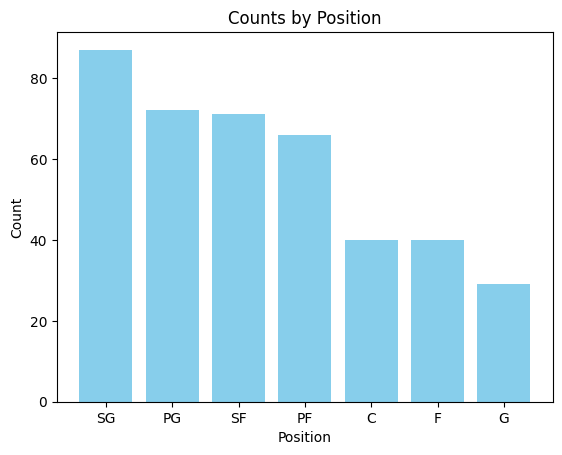

In [5]:
position_counts = df['POS'].value_counts()

plt.bar(position_counts.index, position_counts.values, color='skyblue')

plt.title('Counts by Position')
plt.xlabel('Position')
plt.ylabel('Count')

# Show the plot
plt.show()

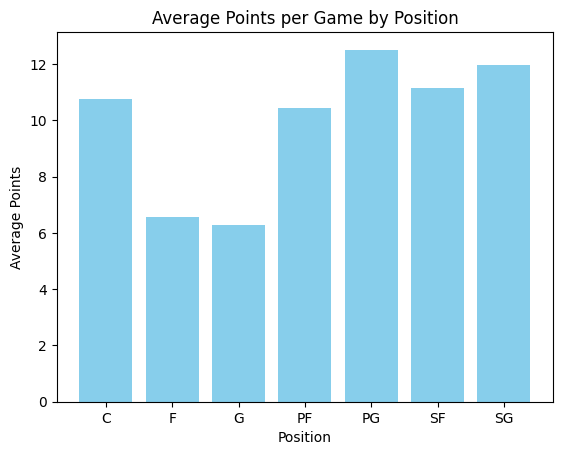

In [6]:
avg_points_per_position = df.groupby('POS')['PPG'].mean()

plt.bar(avg_points_per_position.index, avg_points_per_position.values, color='skyblue')

# Customize the plot
plt.title('Average Points per Game by Position')
plt.xlabel('Position')
plt.ylabel('Average Points')

# Show the plot
plt.show()

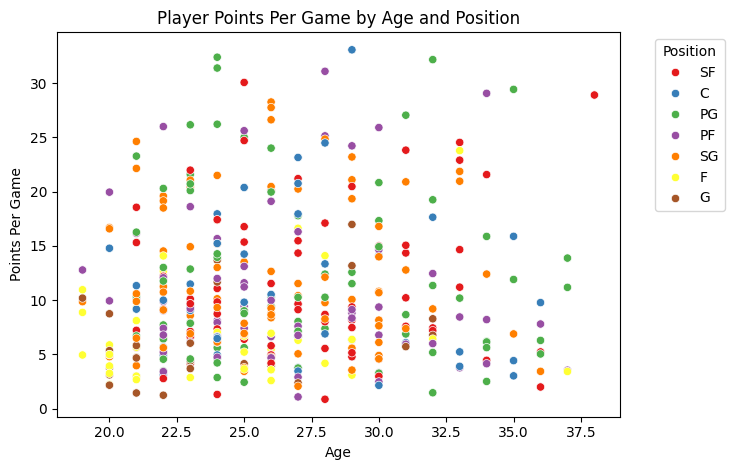

In [7]:
# Create a scatter plot
sns.scatterplot(x='Age', y='PPG', hue='POS', data=df, palette='Set1')

# Customize the plot
plt.title('Player Points Per Game by Age and Position')
plt.xlabel('Age')
plt.ylabel('Points Per Game')

# Show the plot
plt.tight_layout()
plt.legend(title='Position', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [8]:
sorted_df = df[['PName', 'Team', 'Age','GP', 'MPG', 'PPG', 'APG', 'FGAPG', 'FG%', '3PAPG', '3P%', 'PMPG']].sort_values(by='PMPG', ascending=False)

sorted_df.head(20)

,PName,Team,Age,GP,MPG,PPG,APG,FGAPG,FG%,3PAPG,3P%,PMPG
16,Nikola Jokic,DEN,28,69,33.667,24.493,9.826,14.812,63.2,2.159,38.3,9.275
82,Aaron Gordon,DEN,27,68,30.222,16.309,2.985,11.191,56.4,2.544,34.7,7.618
52,Jrue Holiday,MIL,32,67,32.575,19.254,7.388,15.269,47.9,6.134,38.4,7.179
85,Michael Porter Jr.,DEN,24,62,28.998,17.419,1.048,13.177,48.7,7.323,41.4,6.742
121,Kentavious Caldwell-Pope,DEN,30,76,31.332,10.816,2.408,8.316,46.2,4.197,42.3,6.487
1,Joel Embiid,PHI,29,66,34.608,33.076,4.152,20.121,54.8,3.030,33.0,6.424
0,Jayson Tatum,BOS,25,74,36.922,30.068,4.622,21.068,46.6,9.270,35.0,6.351
31,Darius Garland,CLE,23,69,35.467,21.594,7.797,16.362,46.2,5.971,41.0,6.348
58,Desmond Bane,MEM,24,58,31.750,21.500,4.379,16.190,47.9,7.017,40.8,6.138
95,Derrick White,BOS,28,82,28.284,12.402,3.915,9.244,46.2,4.768,38.1,5.951


<ipython-input-9-bde17b136251>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='POS', y='FG%', data=df, palette='Set1')


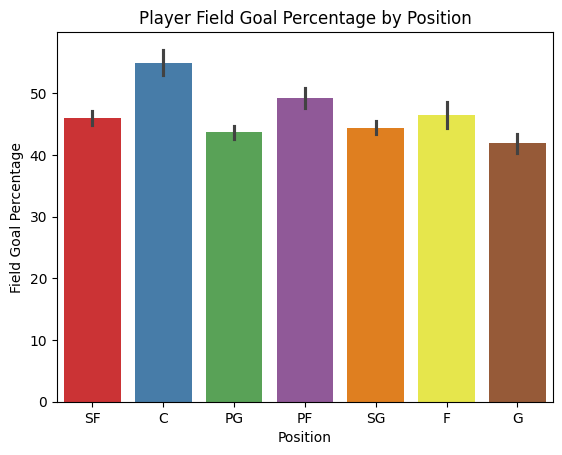

In [9]:
# Plot showing player field goal percentage by position
sns.barplot(x='POS', y='FG%', data=df, palette='Set1')
plt.title('Player Field Goal Percentage by Position')
plt.xlabel('Position')
plt.ylabel('Field Goal Percentage')
plt.show()

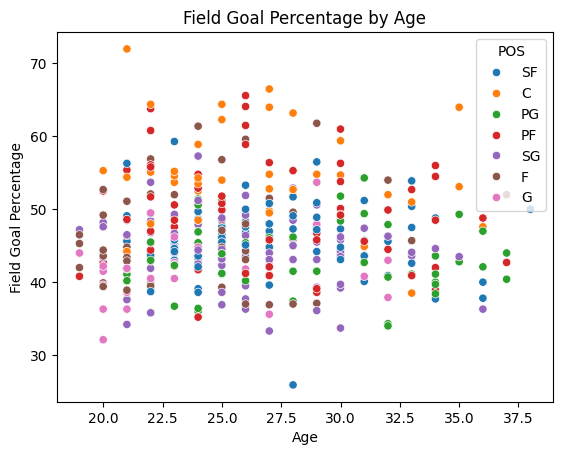

In [10]:
# Plot showing field goal percentage by age
sns.scatterplot(x='Age', y='FG%', hue='POS', data=df, color='skyblue')
plt.title('Field Goal Percentage by Age')
plt.xlabel('Age')
plt.ylabel('Field Goal Percentage')
plt.show()

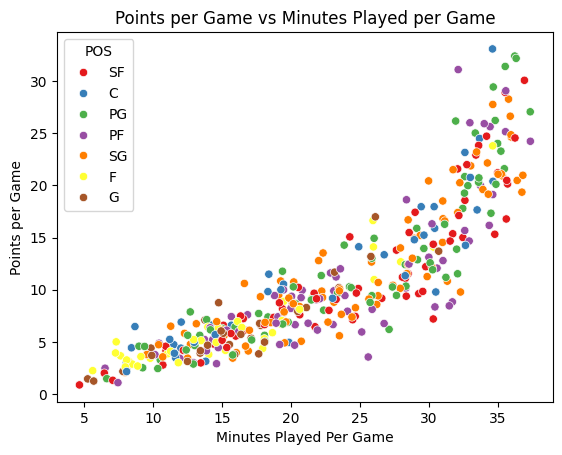

In [11]:
# Plot showing points vs minutes played
sns.scatterplot(x = 'MPG', y = 'PPG', hue='POS', data=df, palette='Set1')
plt.title('Points per Game vs Minutes Played per Game')
plt.xlabel('Minutes Played Per Game')
plt.ylabel('Points per Game')
plt.show()

In [12]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

relationships = [
    ('Age', 'PTS'),
    ('PTS', 'GP'),
    ('FGAPG', 'FGMPG'),
    ('3PMPG', '3PAPG'),
    ('FTM', 'FTA'),
    ('OREB', 'DREB'),
    ('SPG', 'BPG'),
    ('PF', 'BLK'),
    ('APG', 'PPG'),
    ('PPG', 'PMPG'),
    ('PPG', 'FTA'),
    ('PPG', 'FGA'),
    ('PPG', 'MPG'),
    ('PPG', 'TPG'),
    ('PPG', 'FG%')
]

fig = make_subplots(rows=5, cols=3)

for idx, (x_col, y_col) in enumerate(relationships, start=1):
    row = (idx - 1) // 3 + 1
    col = (idx - 1) % 3 + 1
    fig.add_trace(go.Scatter(x=df[x_col], y=df[y_col], mode='markers' if idx != 3 else 'lines'), row=row, col=col)

    fig.update_xaxes(title_text=x_col, row=row, col=col)
    fig.update_yaxes(title_text=y_col, row=row, col=col)

fig.update_layout(
    title_text='Relationships between Related Metrics',
    height=1000,
    width=1200
)

fig.update_layout(showlegend=False)
fig.update_annotations(dict(text='', showarrow=False))

fig.show()

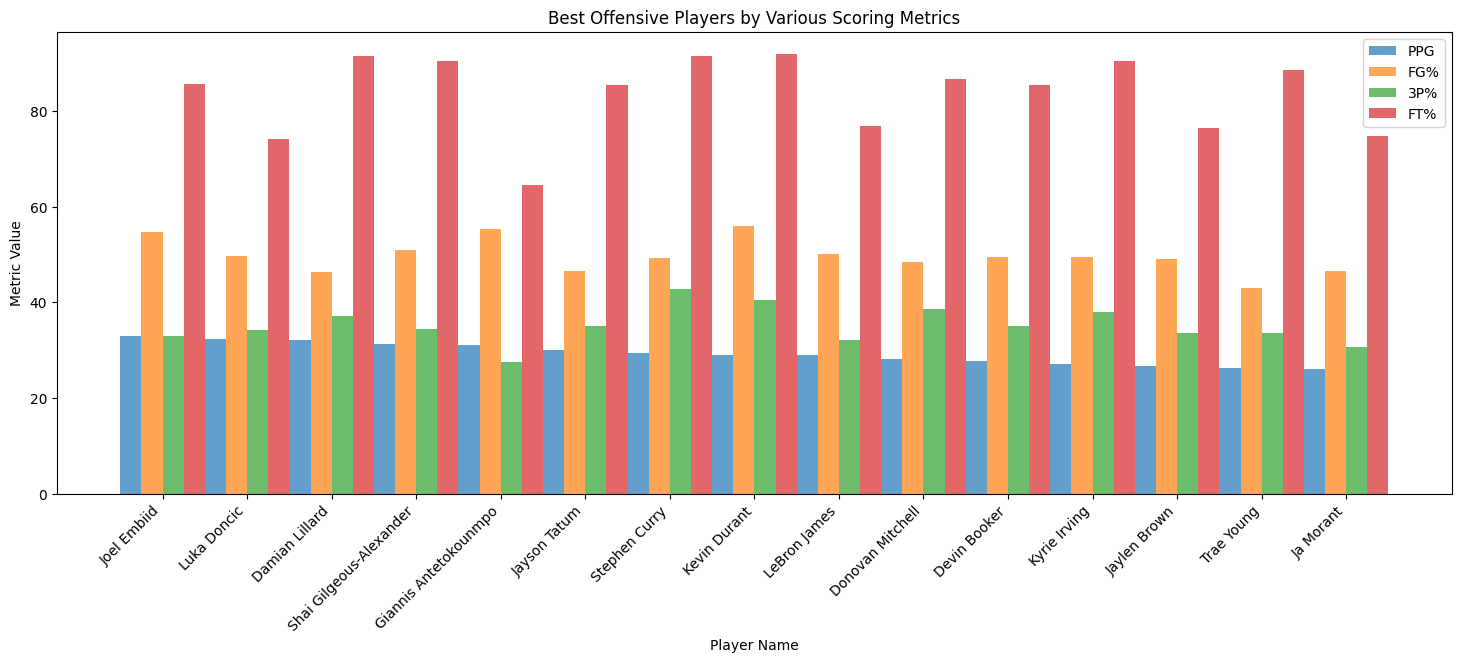

In [13]:
# Sort the data by PPG, FG%, and 3P% to find the best offensive players
df_sorted = df.sort_values(by=['PPG', 'FG%', '3P%', 'FT%'], ascending=False)

# Select the top players
top_players = df_sorted.head(15)

# Set the positions for the bars
positions = np.arange(len(top_players))

# Set the width for each group of bars
bar_width = 0.25

# Plot the grouped bar chart
plt.figure(figsize=(18, 6))
plt.bar(positions - 1.5*bar_width, top_players['PPG'], width=bar_width, alpha=0.7, label='PPG')
plt.bar(positions - 0.5*bar_width, top_players['FG%'], width=bar_width, alpha=0.7, label='FG%')
plt.bar(positions + 0.5*bar_width, top_players['3P%'], width=bar_width, alpha=0.7, label='3P%')
plt.bar(positions + 1.5*bar_width, top_players['FT%'], width=bar_width, alpha=0.7, label='FT%')


# Set x-axis ticks and labels
plt.xticks(positions, top_players['PName'], rotation=45, ha='right')

# Add labels and title
plt.xlabel('Player Name')
plt.ylabel('Metric Value')
plt.title('Best Offensive Players by Various Scoring Metrics')

# Add legend
plt.legend()

plt.show()

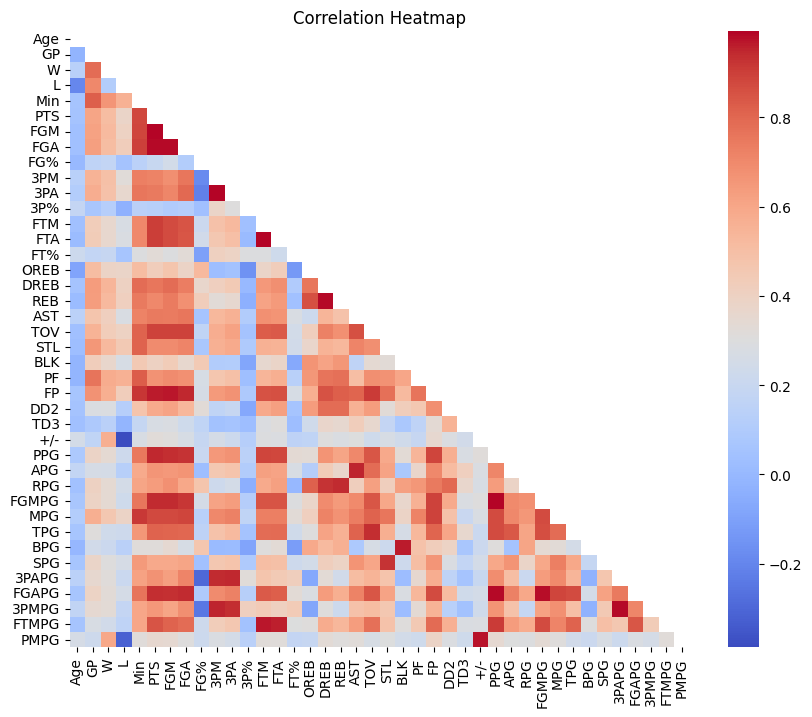

FGM    PTS      0.993
FGMPG  PPG      0.992
FTA    FTM      0.992
3PA    3PM      0.989
3PMPG  3PAPG    0.986
FGA    PTS      0.986
       FGM      0.984
REB    DREB     0.984
FGAPG  PPG      0.983
       FGMPG    0.980
dtype: float64


In [14]:
# Exclude non-numeric columns from the DataFrame
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr = numeric_df.corr().round(3)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=False)

# Add title
plt.title('Correlation Heatmap')

# Show plot
plt.show()

upper_triangle = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))

# Find the pairs of features with the highest correlation coefficients
highest_corr = upper_triangle.unstack().sort_values(ascending=False)

# Print the features with the highest correlation coefficients
print(highest_corr.head(10))


**Modeling**

The dataset is preprocessed by splitting it into training and testing sets. The independent variables (features) are stored in X, while the dependent variable (target) is stored in y.

In [15]:
#Columns dropped based on a high correlation observed in the correlation heatmap to potentially improve the performance of subsequent analyses or models that are sensitive to multicollinearity or high correlation among features
df.drop(columns=['PName', 'POS', 'Team', 'FP', 'OREB', 'DREB', 'DD2', 'TD3', 'FGM', 'FGA', 'FGMPG', 'FGAPG', '3PMPG', '3PAPG', '3PM', '3PA', 'FTA', 'PPG'],
        inplace=True)

X = df.drop('PTS', axis = 1)
y = df['PTS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

**Linear Regression**

Finding the best random state and test size

In [16]:
model = LinearRegression()

test_sizes = [0.15, 0.2, 0.25, 0.3, 0.35]

best_test_size = None
best_random_state = None
best_r2_score = -1

# Test different random states and test sizes
for test_size in test_sizes: # Test different test sizes
    for random_state in range(1, 101): # Test random states from 1 to 100
        X_train, X_test, y_train, y_test = train_test_split(df.drop('PTS', axis=1), df['PTS'], test_size=test_size, random_state=random_state)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        if r2 > best_r2_score:
            best_r2_score = r2
            best_test_size = test_size
            best_random_state = random_state

# Print the best random state, test size, and R2 score
print(f"Best test size: {best_test_size}")
print(f"Best random state: {best_random_state}")
print(f"Best R2 score: {best_r2_score}")

Best test size: 0.15
Best random state: 96
Best R2 score: 0.9753717719997602


Using the best test size and random state...

In [17]:
#Use the best test size and random state
X_train, X_test , y_train, y_test = train_test_split(df.drop('PTS', axis=1), df['PTS'], test_size=.15, random_state=96)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [18]:
y_pred = linear_model.predict(X_test)
linear_r2 = r2_score(y_test, y_pred)
linear_r2

0.9753717719997602

**KNearest Neighbors**

Finding the best random state and test size then best hyperparameters

In [19]:
X = df.drop(columns=['PTS'])
y = df['PTS']

best_random_state = None
best_test_size = None
best_r2_score = -1

# Test different random states and test sizes
for random_state in range(1, 101):  # Test random states from 1 to 100
    for test_size in [0.15, 0.2, 0.25, 0.3, 0.35]:  # Test different test sizes
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
        model = KNeighborsRegressor()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        if r2 > best_r2_score:
            best_r2_score = r2
            best_random_state = random_state
            best_test_size = test_size

# Print the best random state, test size, and R2 score
print("Best Random State:", best_random_state)
print("Best Test Size:", best_test_size)
print("Best R2 Score:", best_r2_score)

Best Random State: 96
Best Test Size: 0.15
Best R2 Score: 0.9296925242887659


In [20]:
# Split the data into training and testing sets using best random state and test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=96)

# Define hyperparameters to tune
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'metric': ['euclidean', 'manhattan']  # Distance metric to use
}

# Create KNeighborsRegressor model
knn = KNeighborsRegressor()

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)

# Fit GridSearchCV to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create KNeighborsRegressor model with the best hyperparameters
best_knn = KNeighborsRegressor(**best_params)

# Train the model with the best hyperparameters
best_knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_knn.predict(X_test)

# Calculate the R2 score
knn_r2 = r2_score(y_test, y_pred)

# Print the best hyperparameters and R2 score
print("Best Hyperparameters:", best_params)
print("R2 Score (test set):", knn_r2)

Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
R2 Score (test set): 0.9344595503707862


**Random Forest Regression**

Finding the best random state and test size then best hyperparameters

In [21]:
X = df.drop(columns=['PTS'])
y = df['PTS']

best_random_state = None
best_test_size = None
best_r2_score = -1

# Test different random states and test sizes
for random_state in range(1, 101, 3):  # Test random states from 1 to 100
    for test_size in [0.15, 0.2, 0.25, 0.3, 0.35]:  # Test different test sizes
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
        model = RandomForestRegressor()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        if r2 > best_r2_score:
            best_r2_score = r2
            best_random_state = random_state
            best_test_size = test_size

# Print the best random state, test size, and R2 score
print("Best Random State:", best_random_state)
print("Best Test Size:", best_test_size)
print("Best R2 Score:", best_r2_score)

Best Random State: 82
Best Test Size: 0.2
Best R2 Score: 0.9656281712467198


In [22]:
# Split the data into training and testing sets using best test size and random state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=82)

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'max_depth': [None, 5, 10, 20],  # Max depth of the tree
    'min_samples_split': [2, 5, 10],  # Min number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Min number of samples required to be at a leaf node
}

# Create Random Forest Regressor model
rf = RandomForestRegressor()

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)

# Fit GridSearchCV to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create Random Forest Regressor model with the best hyperparameters
best_rf = RandomForestRegressor(**best_params)

# Train the model with the best hyperparameters
best_rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_rf.predict(X_test)

# Calculate the R2 score
rf_r2 = r2_score(y_test, y_pred)

# Print the best hyperparameters and R2 score
print("Best Hyperparameters:", best_params)
print("R2 Score (Test Set):", rf_r2)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
R2 Score (Test Set): 0.9666758692329835


**Decision Tree Regression**

Finding the best random state and test size then best hyperparameters

In [23]:
X = df.drop(columns=['PTS'])
y = df['PTS']

best_random_state = None
best_test_size = None
best_r2_score = -1

# Test different random states and test sizes
for random_state in range(1, 101):  # Test random states from 1 to 100
    for test_size in [0.15, 0.2, 0.25, 0.3, 0.35]:  # Test different test sizes
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
        model = DecisionTreeRegressor()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        if r2 > best_r2_score:
            best_r2_score = r2
            best_random_state = random_state
            best_test_size = test_size

# Print the best random state, test size, and R2 score
print("Best Random State:", best_random_state)
print("Best Test Size:", best_test_size)
print("Best R2 Score:", best_r2_score)

Best Random State: 91
Best Test Size: 0.15
Best R2 Score: 0.9423287112077078


In [43]:
# Split the data into training and testing sets using best random state and test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=91)

# Define hyperparameters to tune
param_grid = {
    'max_depth': [None, 5, 10, 20],  # Max depth of the tree
    'min_samples_split': [2, 5, 10],  # Min number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Min number of samples required to be at a leaf node
}

# Create Decision Tree Regressor model
dt = DecisionTreeRegressor()

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)

# Fit GridSearchCV to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best estimator
best_model = grid_search.best_estimator_

# Get the best hyperparameters
best_params = grid_search.best_params_

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Calculate the R2 score
dt_r2 = r2_score(y_test, y_pred)

# Print the best hyperparameters and the R2 score on the test set
print(f"Best Hyperparameters: {best_params}")
print(f"R2 score on test set: {dt_r2}")

Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 10}
R2 score on test set: 0.9259224945286385


**Comparison of R2 Scores from the Different Models**

In [44]:
print(f"Linear Regression: {linear_r2}")
print(f"KNN Regression: {knn_r2}")
print(f"Random Forest Regression: {rf_r2}")
print(f"Decision Tree Regression: {dt_r2}")

Linear Regression: 0.9753717719997602
KNN Regression: 0.9344595503707862
Random Forest Regression: 0.9666758692329835
Decision Tree Regression: 0.9259224945286385



The linear regression model likely achieved the highest R2 score among the four models due to the nature of its assumptions and the underlying relationship it seeks to capture. Linear regression assumes a linear relationship between the input features and the target variable, which can be effective when the relationship between these variables is approximately linear. In scenarios where the relationship is indeed linear or close to linear, linear regression tends to perform well. Additionally, linear regression has a relatively simple structure and is less prone to overfitting compared to more complex models like decision trees or random forests. This simplicity can be advantageous when the dataset is not large or when the relationships in the data are not highly complex, which is likely the case with this NBA dataset.

**Comparing Predicted vs Actual Data Points to Check Model Accuracy**

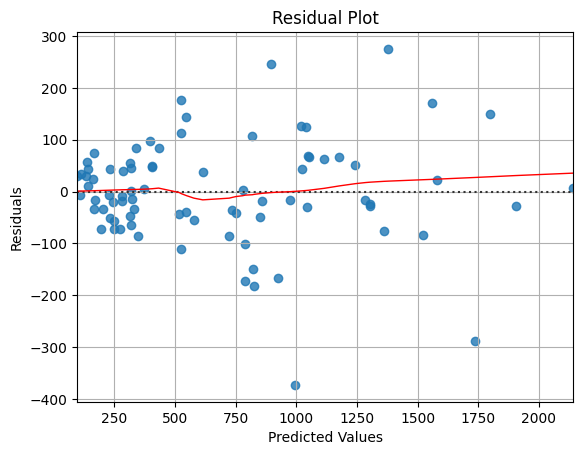

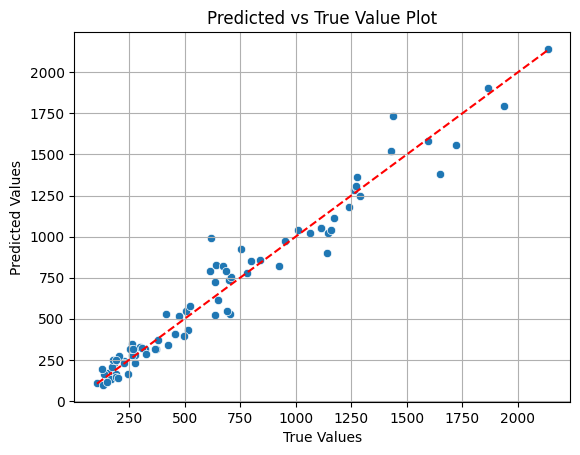

In [26]:
y_pred = linear_model.predict(X_test)

# Calculate residuals
residuals = y_test - y_pred

# Create a residual plot
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

# Create a predicted vs true value plot
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')  # Add a diagonal line for comparison
plt.title('Predicted vs True Value Plot')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

**Checking Model Accuracy with Cross-Validation**

In [42]:
# Perform k-fold cross-validation
k = 5  # Number of folds
cv_scores = cross_val_score(linear_model, X_train, y_train, cv=k, scoring='r2')

# Print the cross-validation scores
print("Cross-validation R2 scores:", cv_scores)

# Calculate the mean and standard deviation of the cross-validation scores
mean_cv_score = np.mean(cv_scores)
std_cv_score = np.std(cv_scores)
print("Mean R2 score:", mean_cv_score)
print("Standard deviation of R2 scores:", std_cv_score)

Cross-validation R2 scores: [0.94025313 0.91391269 0.94815745 0.97120202 0.95803407]
Mean R2 score: 0.9463118735273227
Standard deviation of R2 scores: 0.019218485543865783


The R2 scores obtained from cross-validation range from 0.913 to 0.971, indicating that the model explains between approximately 91.3% and 97.1% of the variance in the target variable. A mean R2 score of 0.946 suggests that, on average, the model explains approximately 94.6% of the variance in the target variable across different subsets of the data. Additionally, the small standard deviation of 0.019 indicates that the model's performance is relatively consistent across folds, with minimal variability in predictive accuracy. Overall, these numbers suggest that the linear regression model performs well and has strong predictive capabilities for the given dataset.

**How I Could Improve the Model Further**

To improve my linear regression model's predictive power even further, I could delve into feature engineering, experiment with different regularization techniques, explore more ensemble methods, and conduct more comprehensive hyperparameter tuning and cross-validation. These steps would help refine the model's predictive accuracy and robustness across various datasets and scenarios. However, my model's R2 score of 0.9754 is quite high and demonstrates its already exceptional ability to accurately predict basketball player points based on selected features.

In [27]:
columns = df.columns

# Print all column names
print("All columns of the DataFrame:")
for col in columns:
    print(col)

All columns of the DataFrame:
Age
GP
W
L
Min
PTS
FG%
3P%
FTM
FT%
REB
AST
TOV
STL
BLK
PF
+/-
APG
RPG
MPG
TPG
BPG
SPG
FTMPG
PMPG


**Using the Best Model to Predict Future Performance**

Create Sample Data

In [39]:
# Define the number of players and games
num_players = 15
num_games = 30

# Create a list to store player statistics
player_stats_list = []

# Generate fake stats for each player
for player_id in range(1, num_players + 1):
    W = np.random.randint(0, num_games)  # Random number of wins
    L = num_games - W  # Calculate number of losses

    player_stats = {
        'Player': f'Player {player_id}',
        'Age': np.random.randint(20, 35),
        'GP': num_games,
        'W': W,
        'L': L,
        'Min': int(np.random.randint(20, 48, num_games).sum()),  # Sum of minutes played over num_games
        'FG%': np.random.uniform(0.35, 0.65),
        '3P%': np.random.uniform(0.20, 0.5),
        'FTM': int(np.random.randint(0, 6, num_games).sum()),  # Sum of free throws made over num_games
        'FT%': np.random.uniform(0.5, 0.93),
        'REB': int(np.random.randint(0, 15, num_games).sum()),  # Sum of rebounds over num_games
        'AST': int(np.random.randint(0, 14, num_games).sum()),  # Sum of assists over num_games
        'TOV': int(np.random.randint(0, 5, num_games).sum()),  # Sum of turnovers over num_games
        'STL': int(np.random.randint(0, 4, num_games).sum()),  # Sum of steals over num_games
        'BLK': int(np.random.randint(0, 3, num_games).sum()),  # Sum of blocks over num_games
        'PF': int(np.random.randint(0, 6, num_games).sum()),  # Sum of personal fouls over num_games
        '+/-': int(np.random.randint(-15, 15, num_games).sum()),  # Sum of plus/minus over num_games
        'APG': np.random.uniform(0.5, 10),
        'RPG': np.random.uniform(1.5, 12),
        'MPG': np.random.randint(27, 46),
        'TPG': np.random.uniform(0.5, 3),
        'BPG': np.random.uniform(0.2, 2),
        'SPG': np.random.uniform(0.3, 2),
        'FTMPG': np.random.uniform(1, 10),
        'PMPG': np.random.uniform(-10, 10)
    }
    player_stats_list.append(player_stats)

# Create a DataFrame from the list of player statistics
fake_stats = pd.DataFrame(player_stats_list)

# Print the fake stats
print("Fake stats for 15 players:")
print(fake_stats)

Fake stats for 15 players:
       Player  Age  GP   W   L   Min       FG%       3P%  FTM       FT%  ...  \
0    Player 1   31  30   5  25  1020  0.369065  0.278713   58  0.820690  ...   
1    Player 2   33  30  23   7   949  0.527319  0.416437   57  0.582969  ...   
2    Player 3   25  30   0  30  1044  0.569529  0.474291   55  0.728749  ...   
3    Player 4   26  30   5  25   935  0.520753  0.462570   86  0.862852  ...   
4    Player 5   31  30   0  30  1016  0.452109  0.409507   69  0.626432  ...   
5    Player 6   25  30  23   7   987  0.505407  0.275078   83  0.622807  ...   
6    Player 7   30  30  23   7  1011  0.367263  0.392884   97  0.702430  ...   
7    Player 8   22  30  14  16   997  0.428053  0.432202   82  0.549283  ...   
8    Player 9   24  30   0  30   979  0.498404  0.321708   81  0.722746  ...   
9   Player 10   30  30  18  12  1066  0.406709  0.394005   74  0.506138  ...   
10  Player 11   29  30   8  22  1001  0.449848  0.347905   72  0.746551  ...   
11  Player 12

**Use Model and Sample Data to Predict Scoring Outputs**

In [41]:
# Extract features for prediction (excluding 'Player' column)
X_predict = fake_stats.drop(columns=['Player'])

# Use the linear model to predict points scored over 30 games
points_predicted_over_games = linear_model.predict(X_predict)

# Ensure predicted points are non-negative
points_predicted_over_games = np.abs(points_predicted_over_games)

# Create a DataFrame to store predicted points for each player
predicted_points_df = pd.DataFrame({'Player': fake_stats['Player'], 'Predicted Points': points_predicted_over_games})

# Sum the predicted points for each player over the 30 games
total_predicted_points_over_games = predicted_points_df.groupby('Player')['Predicted Points'].sum()

# Print the total predicted points and PPG for each player
print("Predicted Points Over 30 Games")
print("Player         Total Predicted Points           PPG")
print("----------------------------------------------------")
for player, total_points in total_predicted_points_over_games.items():
    ppg = total_points / 30 #divided by num of games played
    print(f"{player:<20} {total_points:<25.0f} {ppg:.2f}")

Predicted Points Over 25 Games
Player         Total Predicted Points           PPG
----------------------------------------------------
Player 1             208                       6.95
Player 10            882                       29.40
Player 11            454                       15.13
Player 12            862                       28.72
Player 13            600                       20.01
Player 14            586                       19.54
Player 15            1081                      36.05
Player 2             599                       19.97
Player 3             932                       31.08
Player 4             473                       15.76
Player 5             634                       21.13
Player 6             127                       4.22
Player 7             598                       19.92
Player 8             305                       10.17
Player 9             917                       30.57


The model works reasonably well, predicting scoring outputs that make sense!